# Regressão polinomial

In [1]:
import pandas as pd
import numpy as np

In [2]:
vendas = pd.read_excel('dados/comissao.xlsx')

### Análise inicial

In [3]:
vendas.head()

,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900


In [4]:
vendas.shape

(50, 2)

In [5]:
vendas.dtypes

quantidade    int64
comissao      int64
dtype: object

In [6]:
vendas.isnull().sum()

quantidade    0
comissao      0
dtype: int64

In [7]:
vendas = vendas.astype({'comissao': float})

In [8]:
vendas.dtypes

quantidade      int64
comissao      float64
dtype: object

## Gráfico para análise inicial

In [9]:
import matplotlib.pyplot as plt

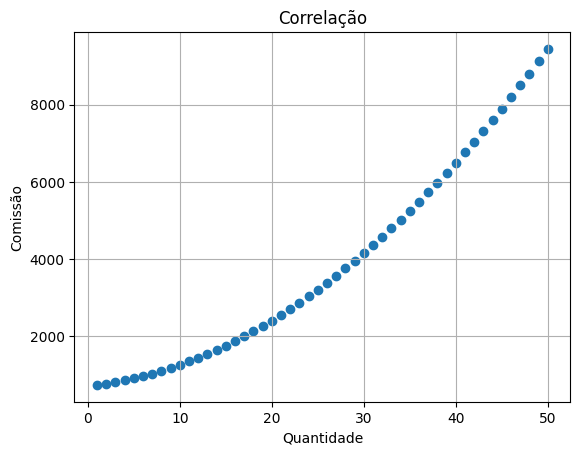

In [10]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

## Normalidade

In [11]:
import scipy.stats as stats

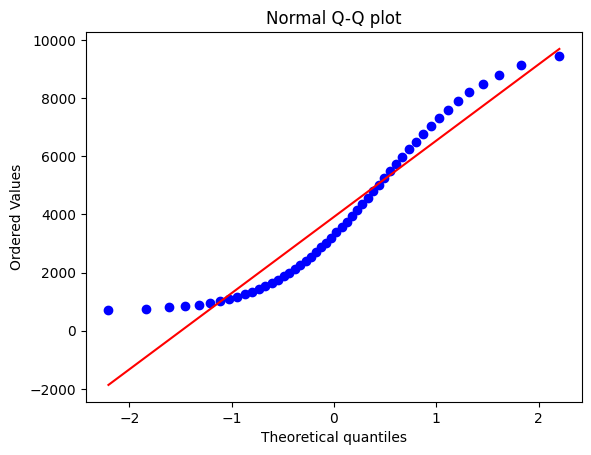

In [12]:
stats.probplot(vendas['comissao'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

### Teste Shapiro-Wilk 
Ho = distribuição normal: p > 0.05<br>
Ha = distribuição != normal: p <= 0.05

In [13]:
estatistica, p_valor = stats.shapiro(vendas.comissao)
print(f'Estatística do teste: {estatistica}')
print(f'             P-valor: {p_valor}')
# A distribuição não é normal

Estatística do teste: 0.9124540090560913
             P-valor: 0.0012719858204945922


### Correlação linear

Pearson (distribuição normal) <br>
Spearman (distribuição não normal) <br>
Kendall (distribuição não normal com quantidade pequena de amostras)

In [14]:
# Spearman
coef, p_valor = stats.spearmanr(vendas.quantidade, vendas.comissao)
print(f'Coeficiente de correlação: {coef}') # Quase perfeita
print(f'P-valor: {p_valor}') # Existe correlação linear

Coeficiente de correlação: 0.9999999999999999
P-valor: 0.0


## Regressão linear 

In [15]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [16]:
# Criação do modelo
regressao = smf.ols('comissao ~ quantidade', data=vendas).fit()

In [17]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           5.98e-34
Time:                        13:02:48   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

Estatística t: <br>
H0 = coeficiente igual a 0: p > 0.05 (coeficiente não validado) <br>
Ha = coeficiente diferente de zero: p <= 0.05 (coeficiente validado)

<b>Equação: </b> Comissão = -626 + (178 * quantidade) <br>
<b>R^2 ajustado</b> = 0.954 <br>
R^2 ajustado -> como os dados que montaram o modelo se adequam ao modelo

A equação não tem sentido

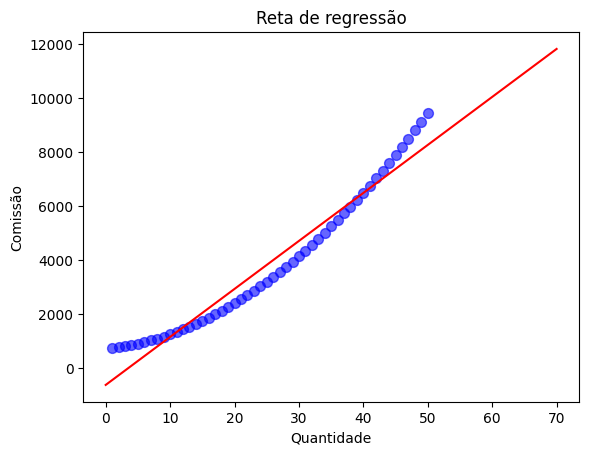

In [18]:
plt.scatter(y=vendas.comissao, x=vendas.quantidade, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 70)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Comissão')
plt.xlabel('Quantidade')
plt.show()

In [19]:
regressao.params

Intercept    -626.0
quantidade    178.0
dtype: float64

In [20]:
regressao.resid

0     1176.0
1     1032.0
2      894.0
3      762.0
4      636.0
5      516.0
6      402.0
7      294.0
8      192.0
9       96.0
10       6.0
11     -78.0
12    -156.0
13    -228.0
14    -294.0
15    -354.0
16    -408.0
17    -456.0
18    -498.0
19    -534.0
20    -564.0
21    -588.0
22    -606.0
23    -618.0
24    -624.0
25    -624.0
26    -618.0
27    -606.0
28    -588.0
29    -564.0
30    -534.0
31    -498.0
32    -456.0
33    -408.0
34    -354.0
35    -294.0
36    -228.0
37    -156.0
38     -78.0
39       6.0
40      96.0
41     192.0
42     294.0
43     402.0
44     516.0
45     636.0
46     762.0
47     894.0
48    1032.0
49    1176.0
dtype: float64

## Regressão polinomial com numpy - grau 2

<b> y = b0 + b1*x + b2*x^2

In [21]:
modelo2 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 2))

In [22]:
y2 = modelo2(vendas.quantidade)
y2

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [23]:
modelo2.coef
#array[0] = x^2, array[1] = x, array[2] = intercept

array([  3.,  25., 700.])

In [24]:
print(f'Equação: Comissão = {modelo2.coef[2]:.1f} + {modelo2.coef[1]:.1f}*quantidade + {modelo2.coef[0]:.1f}*quantidade^2')

Equação: Comissão = 700.0 + 25.0*quantidade + 3.0*quantidade^2


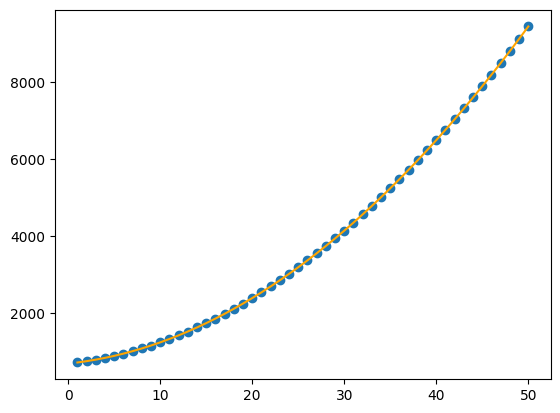

In [25]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, y2, color='orange');

## Regressão polinomial com numpy - grau 3

<b> y = b0 + b1*x + b2*x^2 + b3*x^3

In [26]:
modelo3 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 3))

In [27]:
y3 = modelo3(vendas.quantidade)
y3

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

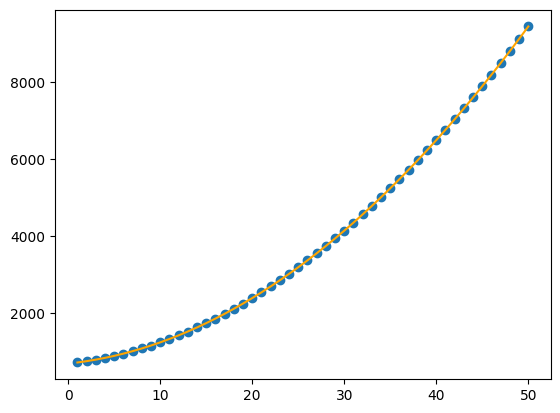

In [28]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, y3, color='orange');

In [29]:
modelo3.coef
# array[0] x^3, array[1] x^2, array[2] x, array[3] intercept 

array([3.78115434e-17, 3.00000000e+00, 2.50000000e+01, 7.00000000e+02])

In [30]:
print(f'Equação: Comissão = {modelo3.coef[3]:.1f} + ({modelo3.coef[2]:.1f} * quantidade) + ({modelo3.coef[1]:.1f} * quantidade ^ 2) + ({modelo3.coef[0]:.1f} * quantidade ^ 3)')

Equação: Comissão = 700.0 + (25.0 * quantidade) + (3.0 * quantidade ^ 2) + (0.0 * quantidade ^ 3)


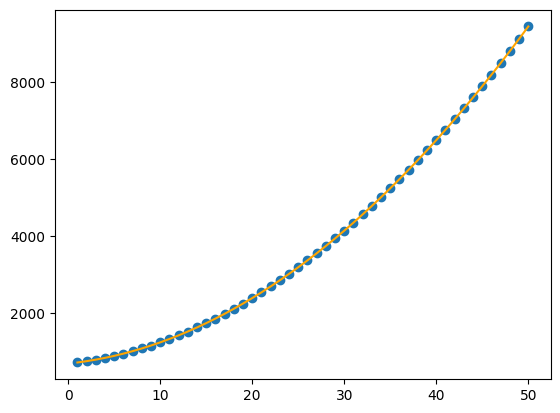

In [31]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, y3, color='orange')

## Regressão polinomial com Sklearn

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [33]:
# Pré processamento
pre_process = PolynomialFeatures(degree=2)

In [34]:
# A var dependente tem que ser escrita com [[ ]]
x = vendas[['quantidade']]
y =vendas.comissao

In [35]:
x

,quantidade
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [36]:
y

0      728.0
1      762.0
2      802.0
3      848.0
4      900.0
5      958.0
6     1022.0
7     1092.0
8     1168.0
9     1250.0
10    1338.0
11    1432.0
12    1532.0
13    1638.0
14    1750.0
15    1868.0
16    1992.0
17    2122.0
18    2258.0
19    2400.0
20    2548.0
21    2702.0
22    2862.0
23    3028.0
24    3200.0
25    3378.0
26    3562.0
27    3752.0
28    3948.0
29    4150.0
30    4358.0
31    4572.0
32    4792.0
33    5018.0
34    5250.0
35    5488.0
36    5732.0
37    5982.0
38    6238.0
39    6500.0
40    6768.0
41    7042.0
42    7322.0
43    7608.0
44    7900.0
45    8198.0
46    8502.0
47    8812.0
48    9128.0
49    9450.0
Name: comissao, dtype: float64

In [37]:
x_poly = pre_process.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 6.000e+00, 3.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 9.000e+00, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 2.400e+01, 5.76

### Criação do modelo

In [38]:
modelo_sk = LinearRegression()

In [39]:
modelo_sk.fit(x_poly, y)

LinearRegression()

In [40]:
y_pred = modelo_sk.predict(x_poly)

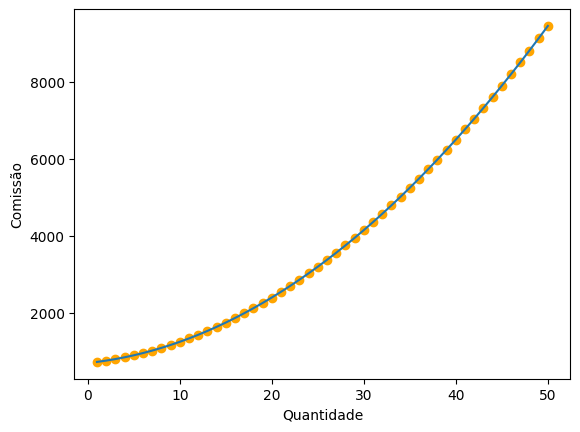

In [42]:
plt.scatter(x, y, c = 'orange')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.plot(x, y_pred);

In [43]:
modelo_sk.coef_

array([ 0., 25.,  3.])

In [44]:
modelo_sk.intercept_

700.0000000000059

In [47]:
print(f'Equação: Comissão = {modelo_sk.intercept_:.1f} + ({modelo_sk.coef_[1]:.1f} * quantidade) + {modelo_sk.coef_[2]:.1f} * (quantidade) ^ 2')

Equação: Comissão = 700.0 + (25.0 * quantidade) + 3.0 * (quantidade) ^ 2


### Previsão

In [59]:
quantidade = 70
previsao = modelo_sk.predict(pre_process.fit_transform([[quantidade]]))
print(f'Se vender {quantidade} peças, irá ganhar {previsao[0]:.2f} reais de comissão.')

Se vender 70 peças, irá ganhar 17150.00 reais de comissão.


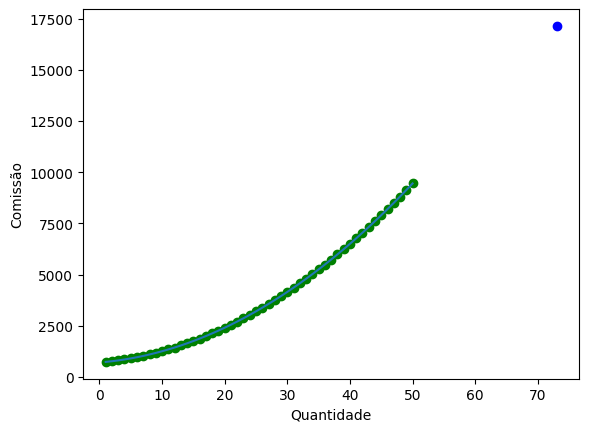

In [65]:
# Gráfico com valor previsto
plt.scatter(x, y,c = 'green')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.plot(x,y_pred)
plt.scatter(73, previsao, c = 'blue')

### Avaliação do modelo

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
# Erro médio quadrático (MSE)
mean_squared_error(y, y_pred)

7.633584584157331e-24

In [67]:
# Erro médio absoluto (MAE)
mean_absolute_error(y, y_pred)

2.3669599613640458e-12